In [1]:
#import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [2]:
df = pd.read_csv('data-midterm.csv',header=0,delimiter=',',encoding='utf-8')

In [3]:
print("SHAPE: \n",df.shape)
print("-"*100)
print('DESCRIBLE: \n',df.describe())
print("-"*100)
print('HEAD: \n',df.head(5))
print("-"*100)
print('DTYPES: \n',df.dtypes)
print("-"*100)
print('INFO: \n',df.info())


SHAPE: 
 (1000, 8)
----------------------------------------------------------------------------------------------------
DESCRIBLE: 
         TimeToPlay  TimeToStudy  ProfessionalScore  ExpectedSalary
count  1000.000000  1000.000000        1000.000000     1000.000000
mean      5.077300     5.064000           1.939700      549.826700
std       2.882923     2.843235           1.142383      263.479774
min       0.000000     0.000000           0.000000      102.100000
25%       2.600000     2.700000           1.000000      321.775000
50%       5.300000     5.200000           2.000000      546.300000
75%       7.500000     7.400000           2.900000      787.700000
max      10.000000    10.000000           4.000000      999.900000
----------------------------------------------------------------------------------------------------
HEAD: 
    TimeToPlay  TimeToStudy  ProfessionalScore InterviewScore Sexuality  \
0         0.1          4.4                2.5              F         T   
1      

In [32]:
# Câu 1:

In [33]:
# Câu 2:

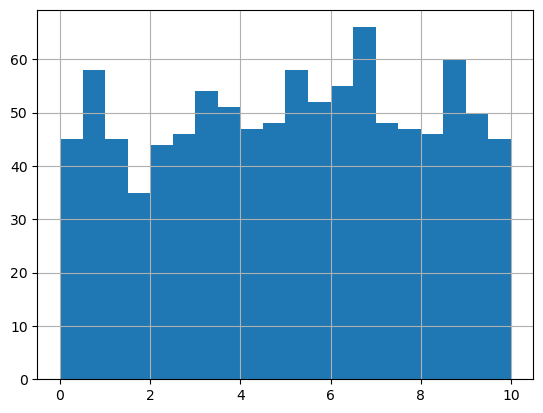

In [4]:
# Câu 3:
df['TimeToStudy'].hist(bins=20)
plt.show()

In [5]:
# Câu 4:
from statsmodels.stats.weightstats import ztest as ztest

#Phương pháp 2: One-Sample ZTest

print(ztest(df['ProfessionalScore'], value=2.4575))
df['ProfessionalScore'].mean()

(-14.333435926932262, 1.3525958975523049e-46)


1.9397

       TimeToPlay  TimeToStudy  ProfessionalScore  ExpectedSalary
count   81.000000    81.000000          81.000000       81.000000
mean     4.467901     5.240741           1.808642      534.734568
std      3.119729     2.900594           1.111440      275.275003
min      0.100000     0.200000           0.000000      105.300000
25%      1.700000     3.000000           1.000000      278.800000
50%      4.300000     5.700000           1.800000      559.400000
75%      6.700000     7.500000           2.700000      794.300000
max     10.000000     9.800000           4.000000      999.800000


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


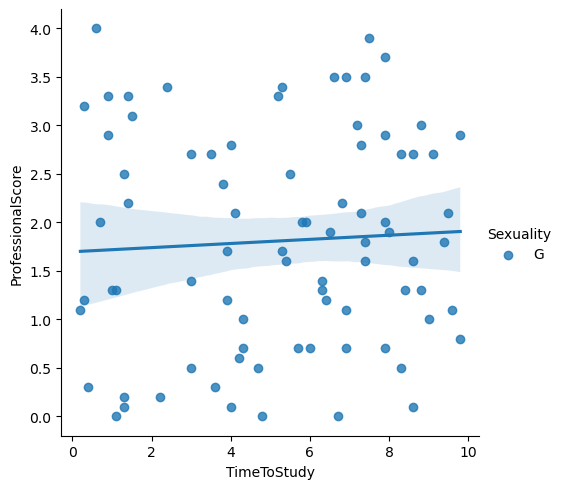

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2865
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.593
Time:                        18:10:41   Log-Likelihood:                -1551.4
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     998   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9052      0.074     25.801      0.0

In [6]:
# Câu 5:
# sns.lmplot(data=df, x='TimeToStudy', y='ProfessionalScore',hue='Sexuality', fit_reg=True)
# plt.show()
import pandas as pd
import statsmodels.api as sm

# Giả định df là DataFrame chứa dữ liệu của bạn
# Lọc dữ liệu theo giới tính G và kết quả phỏng vấn NO
filtered_data = df[(df['Sexuality'] == 'G') & (df['Result'] == 'NO')]
print(filtered_data.describe())
sns.lmplot(data=filtered_data, x='TimeToStudy', y='ProfessionalScore',hue='Sexuality', fit_reg=True)
plt.show()

import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["TimeToStudy"]].values)
y = df[['ProfessionalScore']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())

# 1,7 - 1.9


In [7]:
# Câu 6:
from scipy.stats.stats import pearsonr
print("Viec riêng")
print(pearsonr(df['TimeToPlay'], df['ProfessionalScore']))
print("Viec Hoc")
print(pearsonr(df['TimeToStudy'], df['ProfessionalScore']))
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('ProfessionalScore ~ TimeToPlay', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)
model = ols('ProfessionalScore ~ TimeToStudy', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
print(aov_table)


Viec riêng
PearsonRResult(statistic=0.047634041247077305, pvalue=0.13224923315348872)
Viec Hoc
PearsonRResult(statistic=0.01694062237906501, pvalue=0.5925959975069641)
               df       sum_sq   mean_sq         F    PR(>F)
TimeToPlay    1.0     2.958175  2.958175  2.269614  0.132249
Residual    998.0  1300.775735  1.303383       NaN       NaN
                df       sum_sq   mean_sq         F    PR(>F)
TimeToStudy    1.0     0.374152  0.374152  0.286493  0.592596
Residual     998.0  1303.359758  1.305972       NaN       NaN


C:\Users\Admin\AppData\Local\Temp\ipykernel_9372\90735220.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [8]:
# Câu 7:
import pandas as pd
from scipy.stats import chi2_contingency

# Giả sử df là DataFrame có chứa dữ liệu của bạn
# Bước 1: Tạo bảng crosstab giữa xu hướng tính dục (GT) và điểm phỏng vấn (KT)
crosdata = pd.crosstab(df['Sexuality'], df['InterviewScore'], rownames=['Sexuality'], colnames=['InterviewScore'])

# In bảng Crosstab
print("Crosstab giữa xu hướng tính dục và điểm phỏng vấn:")
print(crosdata)

# Bước 2: Thực hiện kiểm định chi-squared
stat, p, dof, expected = chi2_contingency(crosdata)

# Kiểm tra giá trị p
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0) - Có mối quan hệ giữa xu hướng tính dục và điểm phỏng vấn')
else:
    print('Independent (H0 holds true) - Không có mối quan hệ giữa xu hướng tính dục và điểm phỏng vấn')

# Bước 3: Tìm giá trị nhỏ nhất trong bảng Crosstab
min_value = crosdata.min().min()  # Tìm giá trị nhỏ nhất
min_group = crosdata[crosdata == min_value].stack().index.tolist()  # Tìm nhóm có giá trị nhỏ nhất

print(f"Giá trị nhỏ nhất trong bảng crosstab là {min_value} thuộc nhóm: {min_group}")


Crosstab giữa xu hướng tính dục và điểm phỏng vấn:
InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21
p value is 0.9300780652577139
Independent (H0 holds true) - Không có mối quan hệ giữa xu hướng tính dục và điểm phỏng vấn
Giá trị nhỏ nhất trong bảng crosstab là 5 thuộc nhóm: [('B', 'A')]


In [9]:
import scipy.stats as stats
crosdata = pd.crosstab(df['Sexuality'], df['InterviewScore'])
crosdata

InterviewScore,A,B,C,D,F
Sexuality,,,,,
B,5,24,30,42,32
G,8,19,40,46,34
L,9,37,64,54,38
Q,16,65,126,122,84
T,6,15,31,32,21


In [10]:
# Câu 8:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn
# Bước 1: Tạo các khoảng giá trị và nhãn tương ứng
bins = [0, 5, 7, 9, float('Inf')]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']

# Bước 2: Sử dụng pd.cut để chia TimeToStudy thành các khoảng và gán nhãn
df['StudyGroup'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)
# Bước 3: Đếm số phần tử thuộc nhóm 'Good'
good_count = df[df['StudyGroup'] == 'Good'].shape[0]

print(f"Số phần tử thuộc nhóm nhãn 'Good' là: {good_count}")


Số phần tử thuộc nhóm nhãn 'Good' là: 201


5.75 8.6


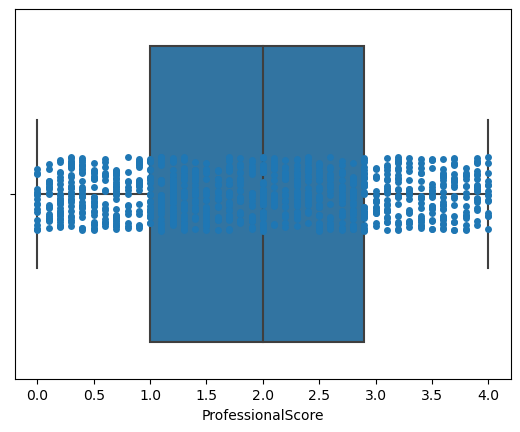

In [11]:
# Câu 9:
ax = sns.boxplot(x="ProfessionalScore", data=df)
ax = sns.stripplot(x="ProfessionalScore", data=df, jitter=True, edgecolor="gray")
IQR = df["ProfessionalScore"].quantile(0.75) - df["ProfessionalScore"].quantile(0.25)
m1 = df["ProfessionalScore"].quantile(0.75) + 1.5 * IQR
print(m1, m1 + 1.5 * IQR)

In [12]:
# Câu 10:
print(df.InterviewScore.mode())

0    D
Name: InterviewScore, dtype: object


In [13]:
# Câu 11:
print(df.ProfessionalScore.quantile(0.75))

2.9


In [14]:
# Câu 12:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu của bạn, và 'TimeToStudy' là cột bạn muốn kiểm tra
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Tính Lower Bound và Upper Bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Giá trị nghi ngờ là bất thường nằm ngoài khoảng: [{lower_bound}, {upper_bound}]")

# Lọc ra các giá trị outliers
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]
print("Các giá trị outliers:", outliers['ProfessionalScore'].values)


Giá trị nghi ngờ là bất thường nằm ngoài khoảng: [-1.8499999999999996, 5.75]
Các giá trị outliers: []


In [15]:
# Câu 13:
import pandas as pd

# Giả sử df là DataFrame chứa dữ liệu, và 'ProfessionalScore' là cột bạn muốn chia
bins = df['ProfessionalScore'].quantile([0, 0.2, 0.5, 0.6, 0.8, 1])

# Gán nhãn cho các khoảng phân vị
labels = ['A', 'B', 'C', 'D', 'E']
df['ScoreGroup'] = pd.cut(df['ProfessionalScore'], bins=bins, labels=labels, include_lowest=True)

# Kiểm tra giá trị 2.7 thuộc nhóm nào
value = 2.7
group = df[df['ProfessionalScore'] == value]['ScoreGroup'].values[0]
print(f"Giá trị ProfessionalScore = {value} thuộc nhóm: {group}")


Giá trị ProfessionalScore = 2.7 thuộc nhóm: D


In [16]:
# Câu 14:
print(df.shape)

(1000, 10)


In [17]:
# Câu 15:
import pandas as pd
from statsmodels.stats.weightstats import ztest

# Giả sử df là DataFrame chứa dữ liệu
# Lọc dữ liệu cho nhóm Sexuality là 'T' và InterviewScore là 'B'
filtered_df = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Lấy giá trị của TimeToPlay và TimeToStudy
M1 = filtered_df['TimeToPlay']
M2 = filtered_df['TimeToStudy']

# Kiểm định z-test
statistic, p_value = ztest(filtered_df['TimeToPlay'], filtered_df['TimeToStudy'], value=0)

# In kết quả
alpha = 0.05
print(f"Statistic: {statistic}, p-value: {p_value}")

# Kiểm tra kết quả p-value với mức sai lầm 5%
if p_value <= alpha:
    print("Có bằng chứng để bác bỏ giả thuyết H0 (trung bình TimeToPlay và TimeToStudy không bằng nhau).")
else:
    print("Không có bằng chứng để bác bỏ giả thuyết H0 (trung bình TimeToPlay và TimeToStudy có thể bằng nhau).")



Statistic: -0.8066329122653516, p-value: 0.41987800602170866
Không có bằng chứng để bác bỏ giả thuyết H0 (trung bình TimeToPlay và TimeToStudy có thể bằng nhau).


In [18]:
# Câu 16:
s_mean = df.ProfessionalScore.mean()
gr_score = df.groupby(['Sexuality'])['ProfessionalScore'].agg('mean')
print(gr_score)
print(s_mean)

Sexuality
B    2.025564
G    1.903401
L    1.919307
Q    1.960533
T    1.839048
Name: ProfessionalScore, dtype: float64
1.9397


In [19]:
# Câu 17:

In [19]:
# Câu 18:
import statsmodels.api as sm
X_with_constant = sm.add_constant(df[["TimeToStudy","TimeToPlay"]].values)
y = df[['ProfessionalScore']].values
result = sm.OLS(y, X_with_constant).fit()
print(result.summary())
# a0 = 5.2
# a1 = 0.0161
# a2 = -0.0906
# M3 = 5.2 + 0.0161 * M1 + (-0.0906) * M2
print(1.8134 + 0.0062 * 5.0 + 0.0187 * 7.0) # M3 = 4.798

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Sat, 12 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:11:12   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8134      0.096     18.860      0.0

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['lbResult']= label_encoder.fit_transform(df['Result']) 
print(df['lbResult'].head(5))
print(df['Result'].head(5))
# No: 0, Yes: 1

0    0
1    1
2    0
3    1
4    0
Name: lbResult, dtype: int32
0     NO
1    YES
2     NO
3    YES
4     NO
Name: Result, dtype: object


In [21]:
# Câu 19:

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('lbResult ~ Sexuality', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Sexuality,4.0,1.217593,0.304398,1.2205,0.30037
Residual,995.0,248.157407,0.249404,NaN,NaN


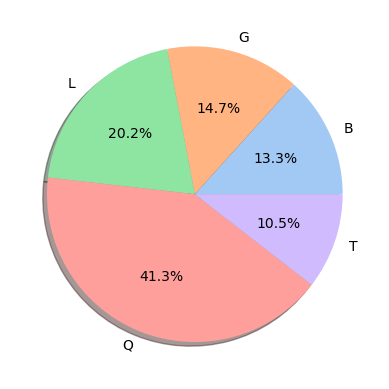

Sexuality
B    0.133
G    0.147
L    0.202
Q    0.413
T    0.105
Name: count, dtype: float64


In [22]:
# Câu 20:
gb = df.groupby(['Sexuality'])['Sexuality'].agg(['count'])
labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()
print(gb['count']/gb['count'].sum())

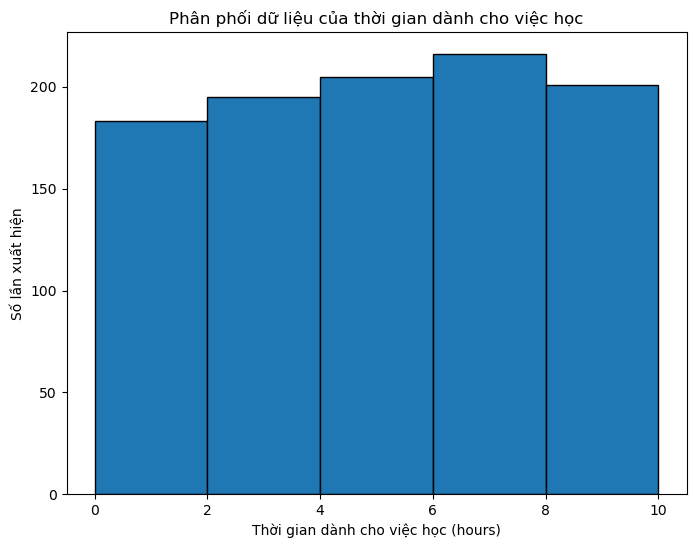

In [23]:
# Câu 21:import matplotlib.pyplot as plt

# Thay đổi 'TimeToStudy' thành tên cột thực tế
plt.figure(figsize=(8, 6))
plt.hist(df['TimeToStudy'], bins=5, edgecolor='black')

# Thêm tiêu đề và nhãn cho trục
plt.title('Phân phối dữ liệu của thời gian dành cho việc học')
plt.xlabel('Thời gian dành cho việc học (hours)')
plt.ylabel('Số lần xuất hiện')

# Hiển thị biểu đồ
plt.show()

In [25]:
# Câu 22:# Giả sử bạn đã có df với cột ProfessionalScore
# Tìm giá trị min và max của cột ProfessionalScore
min_value = df['ProfessionalScore'].min()
max_value = df['ProfessionalScore'].max()

# Giá trị đã được scale là 0.65
scaled_value = 0.65

# Tính giá trị ban đầu (original_value)
original_value = min_value + (scaled_value * (max_value - min_value))

# Hiển thị giá trị ban đầu
print(f"Giá trị ban đầu của 0.65 sau khi scale là: {original_value}")


Giá trị ban đầu của 0.65 sau khi scale là: 2.6


In [25]:
# Câu 23:

In [ ]:
import pandas as pd
import numpy as np

# Tạo bảng Crosstab giữa xu hướng tính dục và điểm phỏng vấn
crosstab = pd.crosstab(df['Sexual_Orientation'], df['Interview_Score'])

# Tìm giá trị yếu vị (mode) và số lần nó xuất hiện trong bảng Crosstab
mode_value = crosstab.values.flatten().max()
mode_indices = list(zip(*np.where(crosstab.values == mode_value)))

print("Giá trị yếu vị và số lần nó xuất hiện trong bảng Crosstab là:")
for index in mode_indices:
    sexual_orientation = crosstab.index[index]
    interview_score = crosstab.columns[index]
    print(f"Xu hướng tính dục: {sexual_orientation}, Điểm phỏng vấn: {interview_score}, Số lần xuất hiện: {mode_value}")


Giá trị yếu vị và số lần nó xuất hiện trong bảng Crosstab là:


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [26]:
# Câu 24:

In [27]:
# Câu 25: